# TASK 1 NEURAL NETWORKS WITH ONE HIDDEN LAYER

In [ ]:
import numpy as np
import util_mnist_reader as mnist_reader
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
#Loading the data
train_X, train_Y = mnist_reader.load_mnist('data/fashion', kind='train')
test_X, test_Y = mnist_reader.load_mnist('data/fashion', kind='t10k')

train_X = np.asmatrix(train_X)
train_Y = np.asmatrix(train_Y).T
test_X = np.asmatrix(test_X)
test_Y = np.asmatrix(test_Y).T

train_X= train_X/255
test_X=test_X/255



In [28]:
print(train_X.shape)

(60000, 784)


In [29]:
test_X.shape

(10000, 784)

In [30]:
train_Y = train_Y.reshape(train_X.shape[0], 1)
test_Y = test_Y.reshape(test_X.shape[0], 1)

In [31]:
print(train_Y.shape)

(60000, 1)


In [32]:
test_Y

matrix([[9],
        [2],
        [1],
        ...,
        [8],
        [1],
        [5]], dtype=uint8)

In [33]:
dim = train_X.shape[0]
print(dim)

60000


In [34]:
#initialising the data
learning_rate = 0.5
hidden_size = 128
output_size = 10
input_size = train_X.shape[1]
Cost = []
Acc  = []

In [35]:
array = np.zeros((train_Y.shape[0],10))
for i in range(train_Y.shape[0]):
    j=int(train_Y[i])
    array[i,j]= 1
train_Y1 = array

In [36]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [37]:
#initialising the wights
weight_input = np.random.randn(input_size, hidden_size)
weight_hidden = np.random.randn(hidden_size, output_size)

In [38]:
weight_input.shape

(784, 128)

In [39]:
weight_hidden.shape

(128, 10)

In [40]:
#initialising the bias
bias_input = np.zeros((1, hidden_size))
bias_hidden = np.zeros((1, output_size))

In [41]:
def softmax(z):
    result = np.zeros((z.shape[0],z.shape[1]))
    expZ = np.exp(z)
    result= expZ / np.sum(expZ,axis = 1)
    return result

In [42]:
def to_label(a_hidden):
    predicted = np.asmatrix(a_hidden.argmax(axis=1))
    return predicted

In [43]:
#forward  propogation
def forwardPropogation(weight_input,weight_hidden,bias_input,bias_hidden,train_X):
    z_input = np.dot(train_X, weight_input) + bias_input
    a_input = sigmoid(z_input)
    #print("Sigmoid")
    #print(a_input.shape)
    z_hidden = np.dot(a_input, weight_hidden) + bias_hidden
    a_hidden = softmax(z_hidden)
    return a_input,a_hidden

In [44]:
#backward pass
def backwardPropogation(weight_input,weight_hidden,a_input,a_hidden,bias_input,bias_hidden,train_X,train_Y1):
    samples=train_X.shape[0]
    
    delta_weight_hidden_t = np.dot(a_input.T,np.subtract(a_hidden, train_Y1))
    delta_weight_hidden=delta_weight_hidden_t*(1/samples)
    
    weight_hidden = weight_hidden - (learning_rate*delta_weight_hidden)
    
   
    delta_bias_hidden_t=np.sum(np.subtract(a_hidden, train_Y1),axis=0)
    delta_bias_hidden=delta_bias_hidden_t*(1/samples)
    
    bias_hidden = bias_hidden - (learning_rate*delta_bias_hidden)

    delta_weight_input=np.dot(train_X.T,np.multiply((np.multiply((1-a_input),a_input)),np.dot(np.subtract(a_hidden, train_Y1),weight_hidden.T)))*(1/samples)
    
    weight_input=weight_input-(learning_rate*delta_weight_input)
    
    delta_bias_input_t=np.sum(np.multiply((np.multiply((1-a_input),a_input)),np.dot(np.subtract(a_hidden, train_Y1),weight_hidden.T)),axis=0)
   
    delta_bias_input = delta_bias_input_t * (1/samples)
    

    bias_input  = bias_input - (learning_rate * delta_bias_input)
    
    return weight_input,weight_hidden,bias_input,bias_hidden
    

In [45]:
#calculating the cost
def cost_Function(train_Y1,a_hidden):
    samples = train_Y1.shape[0]
    loss = np.sum(np.multiply(np.log(a_hidden),train_Y1,))
    cost = -(1/samples)*loss
    return cost

In [46]:
#calculating the accuracy
def accuracy(y_predicted, y_true):
    count =0
    for i in range(y_predicted.shape[0]):
        if(y_predicted[i]==y_true[i]):
            count += 1
    return (count/float(y_predicted.shape[0])) * 100


In [47]:
#training the model
for i in range(800):
    
    a_input,a_hidden = forwardPropogation(weight_input,weight_hidden,bias_input,bias_hidden,train_X)
    weight_input,weight_hidden,bias_input,bias_hidden = backwardPropogation(weight_input,weight_hidden,a_input,a_hidden,bias_input,bias_hidden,train_X,train_Y1)
    Cost.append(cost_Function(train_Y1,a_hidden))
    if i%100 == 0:
        print(Cost)
    Y_predicted = to_label(a_hidden) 
    Acc.append(accuracy(Y_predicted, train_Y))

[9.939289587195011]
[9.939289587195011, 7.794862793622186, 5.437515961077815, 4.241386673330485, 3.693099329944883, 3.2913544414409808, 3.0116303887911893, 2.8005967686917344, 2.635636620134694, 2.501890409159233, 2.3901005382256404, 2.294914776659255, 2.212552898795328, 2.1404286165829345, 2.0765503236046654, 2.0195945560255644, 1.9682786054013792, 1.9219543262627847, 1.8796640664839508, 1.8411401429229843, 1.805645132977085, 1.7730277303928035, 1.7428779427855718, 1.7147625536109343, 1.6889833871441564, 1.6641997763074006, 1.6421366757538907, 1.6196710781109422, 1.600906577359846, 1.5799614349133961, 1.5642026465494945, 1.5443373308483743, 1.5311943415223779, 1.5124717374205747, 1.50112185841489, 1.484159803138988, 1.4730656511171578, 1.4588667875373067, 1.4459596194103888, 1.4354814001510257, 1.419059911778845, 1.4127934759854848, 1.3923953067404766, 1.3903247215275791, 1.366523399435048, 1.3683857250100528, 1.3419586580018477, 1.3474554424879093, 1.3189494511964364, 1.3278025492286

[9.939289587195011, 7.794862793622186, 5.437515961077815, 4.241386673330485, 3.693099329944883, 3.2913544414409808, 3.0116303887911893, 2.8005967686917344, 2.635636620134694, 2.501890409159233, 2.3901005382256404, 2.294914776659255, 2.212552898795328, 2.1404286165829345, 2.0765503236046654, 2.0195945560255644, 1.9682786054013792, 1.9219543262627847, 1.8796640664839508, 1.8411401429229843, 1.805645132977085, 1.7730277303928035, 1.7428779427855718, 1.7147625536109343, 1.6889833871441564, 1.6641997763074006, 1.6421366757538907, 1.6196710781109422, 1.600906577359846, 1.5799614349133961, 1.5642026465494945, 1.5443373308483743, 1.5311943415223779, 1.5124717374205747, 1.50112185841489, 1.484159803138988, 1.4730656511171578, 1.4588667875373067, 1.4459596194103888, 1.4354814001510257, 1.419059911778845, 1.4127934759854848, 1.3923953067404766, 1.3903247215275791, 1.366523399435048, 1.3683857250100528, 1.3419586580018477, 1.3474554424879093, 1.3189494511964364, 1.3278025492286702, 1.2975625511429

[9.939289587195011, 7.794862793622186, 5.437515961077815, 4.241386673330485, 3.693099329944883, 3.2913544414409808, 3.0116303887911893, 2.8005967686917344, 2.635636620134694, 2.501890409159233, 2.3901005382256404, 2.294914776659255, 2.212552898795328, 2.1404286165829345, 2.0765503236046654, 2.0195945560255644, 1.9682786054013792, 1.9219543262627847, 1.8796640664839508, 1.8411401429229843, 1.805645132977085, 1.7730277303928035, 1.7428779427855718, 1.7147625536109343, 1.6889833871441564, 1.6641997763074006, 1.6421366757538907, 1.6196710781109422, 1.600906577359846, 1.5799614349133961, 1.5642026465494945, 1.5443373308483743, 1.5311943415223779, 1.5124717374205747, 1.50112185841489, 1.484159803138988, 1.4730656511171578, 1.4588667875373067, 1.4459596194103888, 1.4354814001510257, 1.419059911778845, 1.4127934759854848, 1.3923953067404766, 1.3903247215275791, 1.366523399435048, 1.3683857250100528, 1.3419586580018477, 1.3474554424879093, 1.3189494511964364, 1.3278025492286702, 1.2975625511429

[9.939289587195011, 7.794862793622186, 5.437515961077815, 4.241386673330485, 3.693099329944883, 3.2913544414409808, 3.0116303887911893, 2.8005967686917344, 2.635636620134694, 2.501890409159233, 2.3901005382256404, 2.294914776659255, 2.212552898795328, 2.1404286165829345, 2.0765503236046654, 2.0195945560255644, 1.9682786054013792, 1.9219543262627847, 1.8796640664839508, 1.8411401429229843, 1.805645132977085, 1.7730277303928035, 1.7428779427855718, 1.7147625536109343, 1.6889833871441564, 1.6641997763074006, 1.6421366757538907, 1.6196710781109422, 1.600906577359846, 1.5799614349133961, 1.5642026465494945, 1.5443373308483743, 1.5311943415223779, 1.5124717374205747, 1.50112185841489, 1.484159803138988, 1.4730656511171578, 1.4588667875373067, 1.4459596194103888, 1.4354814001510257, 1.419059911778845, 1.4127934759854848, 1.3923953067404766, 1.3903247215275791, 1.366523399435048, 1.3683857250100528, 1.3419586580018477, 1.3474554424879093, 1.3189494511964364, 1.3278025492286702, 1.2975625511429

In [57]:
Accuracy = Acc[-1]
COST = Cost[-1]
print("The lowest cost is: ",COST)
print("The Training accuracy is: ",Accuracy,"%")

The lowest cost is:  0.5939585059347797
The Training accuracy is:  79.755 %


In [60]:
#test data accuracy calculation
z_input = np.dot(test_X, weight_input) + bias_input
a_input = sigmoid(z_input)

z_hidden = np.dot(a_input, weight_hidden) + bias_hidden
a_hidden = softmax(z_hidden)

y_pred_test=to_label(a_hidden)
Acc_test= accuracy(Y_predicted, train_Y)
print("The test accuracy is: ",Acc_test,"%")

The test accuracy is:  79.755 %


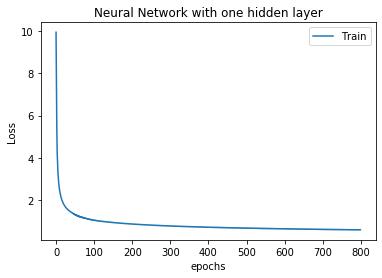

In [61]:
plt.plot(Cost, label='Train')
plt.title("Neural Network with one hidden layer")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend() 

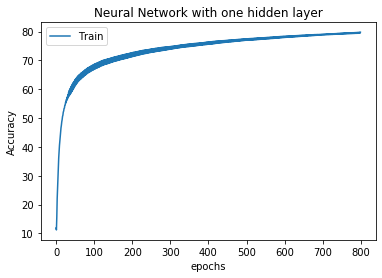

In [62]:
plt.plot(Acc, label='Train')
plt.title("Neural Network with one hidden layer")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend() 

[[5097   40  141  350   92   11  179    1   81    8]
 [  58 5627   80  169   38    4   14    0    9    1]
 [ 134   26 4147   83 1308    8  182    2  109    1]
 [ 431  142   92 4894  337    8   58    1   35    2]
 [  40   23  622  223 4853    8  173    0   58    0]
 [  11    4   13   14    4 5180   11  427   82  254]
 [1407   28  960  271 1334   13 1812    1  172    2]
 [   3    0    1    0    0  368    0 5216   32  380]
 [  42    1   81   34   82   88   70   63 5525   14]
 [   7    1    5   11    2  147    4  310   11 5502]]


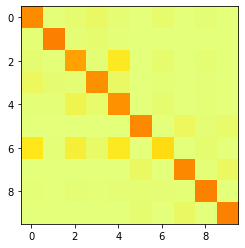

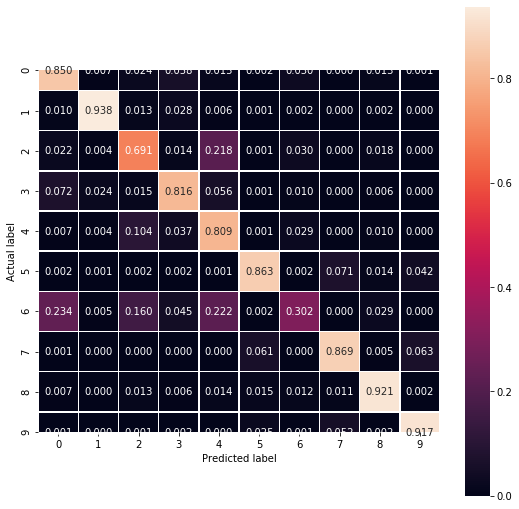

In [63]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(train_Y, Y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


# TASK 2 Multilayer Neural network using Keras and tensorflow

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 34us/step - loss: 1.8280 - accuracy: 0.5525 - val_loss: 1.4631 - val_accuracy: 0.6853
Epoch 2/30
60000/60000 [==============================] - 2s 31us/step - loss: 1.2658 - accuracy: 0.7098 - val_loss: 1.1279 - val_accuracy: 0.7153
Epoch 3/30
60000/60000 [==========

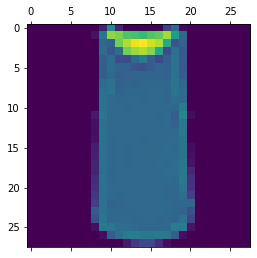

In [64]:
import keras
import tensorflow as tf
import datetime
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten


logdir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
fashion_mnist = keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
plt.matshow(x_train[2])


x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

model=Sequential()

model.add(Flatten(input_shape=[28,28]))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_test,y_test),callbacks=[tensorboard_callback])

test_loss,test_acc=model.evaluate(x_test,y_test)
print('\ntest accuracy:',test_acc)


[[4998   44   73  348   27   14  407    1   88    0]
 [  15 5663  101  178   19    0   22    0    2    0]
 [  80   14 4181   47 1002   14  597    0   65    0]
 [ 277   78   55 5145  231    1  192    0   21    0]
 [  11   14  438  219 4791    6  483    0   37    1]
 [   5    1    1    6    0 5344    1  431   37  174]
 [1116   23  730  210  755   17 3017    1  129    2]
 [   0    0    0    0    0  309    0 5297   11  383]
 [  21    5   48   69   24   56  143   41 5583   10]
 [   0    1    1    6    0  129    3  332    3 5525]]


<Figure size 432x288 with 0 Axes>

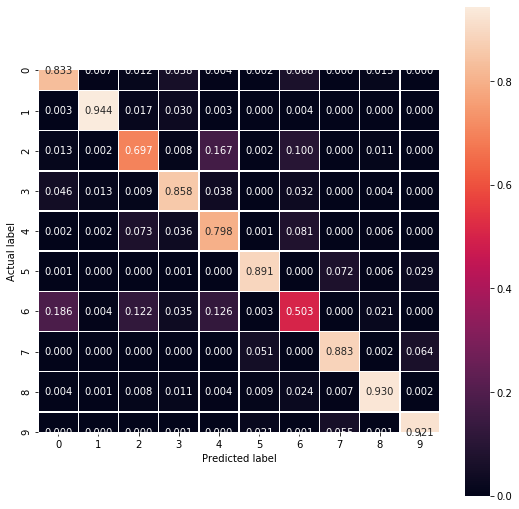

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions1 = model.predict_classes(x_train)

cm = confusion_matrix(y_train, predictions1 )
print(cm)
plt.clf()
#plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# TASK 3 Convolutional Neural Network using Keras

Epoch 1/5
60000/60000 [==============================] - 58s 968us/step - loss: 0.4616 - accuracy: 0.8360
Epoch 2/5
60000/60000 [==============================] - 58s 961us/step - loss: 0.3166 - accuracy: 0.8857
Epoch 3/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2757 - accuracy: 0.9007
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2481 - accuracy: 0.9105
Epoch 5/5
10000/10000 [==============================] - 3s 347us/step
Test loss 0.2735633068084717
Test accuracy 0.8989999890327454
0


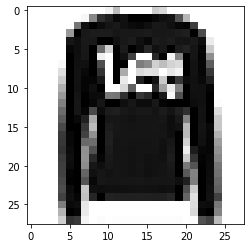

In [70]:
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation, MaxPooling2D, Dense, Dropout
import util_mnist_reader as mnist_reader
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
train_X, train_Y = mnist_reader.load_mnist('data/fashion', kind='train')
test_X, test_Y = mnist_reader.load_mnist('data/fashion', kind='t10k')

train_X_C = train_X.reshape(-1, 28,28, 1)
test_X_C = test_X.reshape(-1, 28,28, 1)

train_X_C = train_X_C.astype('float32')
test_X_C = test_X_C.astype('float32')
train_X_C = train_X_C / 255
test_X_C = test_X_C / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

values=model.fit(train_X_C, train_Y_one_hot, batch_size=64, epochs=5)

test_loss, test_acc = model.evaluate(test_X_C, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict_classes(train_X_C)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Text(0.5, 0, 'Epochs')

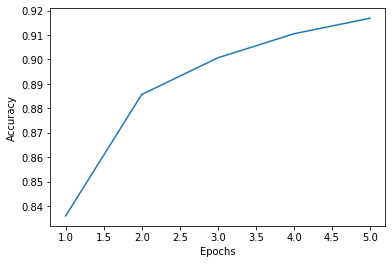

In [71]:
epochs = [1,2,3,4,5] 
plt.plot(epochs,values.history['accuracy'] , label='Train')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")


Text(0.5, 0, 'Epochs')

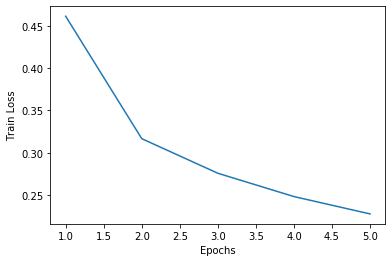

In [72]:
plt.plot(epochs, values.history['loss'], label='Train')
plt.ylabel("Train Loss")
plt.xlabel("Epochs")

[[4972    4  135  162   10    2  669    0   46    0]
 [   4 5950    1   36    3    0    3    0    3    0]
 [  31    1 5456   57  222    0  220    0   13    0]
 [  36   41   27 5750   69    0   67    0   10    0]
 [   1    8  316  200 5081    1  382    0   11    0]
 [   0    0    0    0    0 5967    0   17    7    9]
 [ 419    6  375  190  213    1 4748    0   48    0]
 [   0    0    0    0    0   55    0 5791    3  151]
 [   0    1    3    2    2    2    6    1 5983    0]
 [   0    0    0    0    0   39    0  104    7 5850]]


<Figure size 432x288 with 0 Axes>

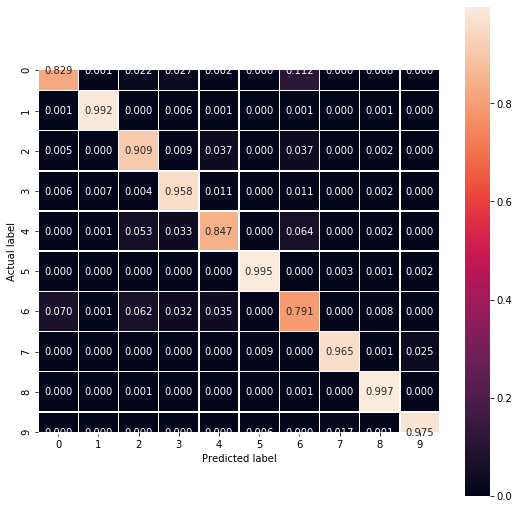

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(train_Y_one_hot.argmax(axis = 1), predictions )
print(cm)
plt.clf()
#plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');